<a href="https://colab.research.google.com/github/aravindh698/rep2/blob/master/Final_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [63]:
df=pd.read_csv('/content/heart (2).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [65]:
scaler = StandardScaler()
scaler.fit(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [66]:
from sklearn.model_selection import train_test_split
y=df['target']
x=df.drop('target',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)
#train the classifier
logistic_clf.fit(x_train,y_train)
logistic_clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

{'C': 1, 'class_weight': None, 'penalty': 'l2'}

In [68]:
logistic_predict = logistic_clf.predict(x_test)
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 88.52%


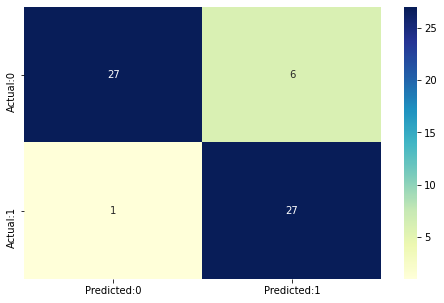

In [69]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [70]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



Using k-nearest neighbours we get an accuracy of 52.46%


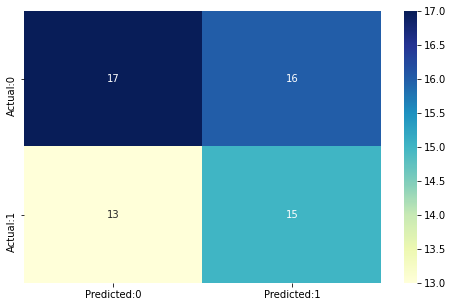

In [71]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)
# train the model
knn_clf.fit(x_train,y_train)
knn_clf.best_params_
# predictions
knn_predict = knn_clf.predict(x_test)
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Using Decision Trees we get an accuracy of 62.3%


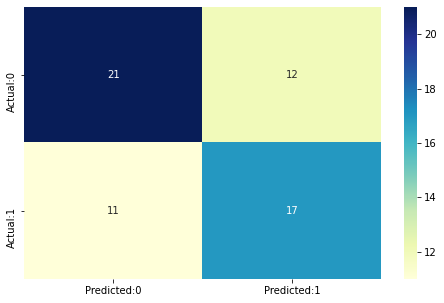

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
# train the model
tree_clf.fit(x_train,y_train)
tree_clf.best_params_
# predictions
tree_predict = tree_clf.predict(x_test)
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Using SVM we get an accuracy of 57.38%


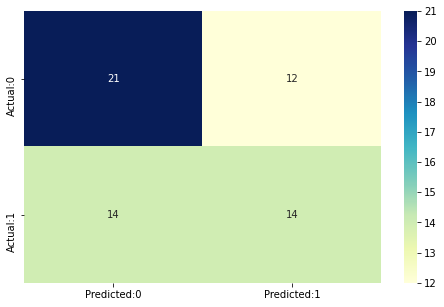

In [73]:

from sklearn.svm import SVC

#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

# train the model
svm_clf.fit(x_train,y_train)
svm_clf.best_params_

# predictions
svm_predict = svm_clf.predict(x_test)
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Using rfc we get an accuracy of 83.61%


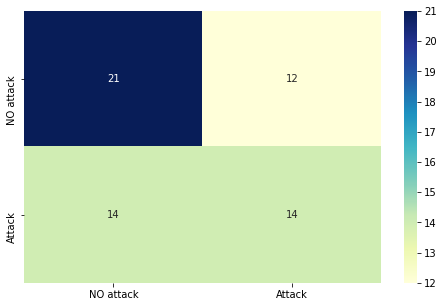

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=20,max_features=7)
rfc.fit(x_train,y_train)
rfc_predict=rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_predict)
print(f"Using rfc we get an accuracy of {round(rfc_accuracy*100,2)}%")
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['NO attack','Attack'],index=['NO attack','Attack'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


Using gnb we get an accuracy of 81.97%


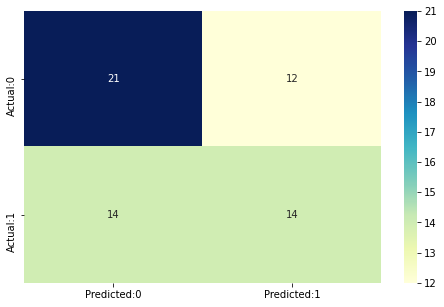

In [75]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_accuracy = accuracy_score(y_test,clf_predict)
print(f"Using gnb we get an accuracy of {round(clf_accuracy*100,2)}%")
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")




In [76]:
svm_percision=precision_score(y_test,svm_predict)
logistic_percision=precision_score(y_test,logistic_predict)
knn_percision=precision_score(y_test,knn_predict)
tree_percision=precision_score(y_test,tree_predict)
clf_percision=precision_score(y_test,clf_predict)
rfc_percision=precision_score(y_test,rfc_predict)

In [77]:
svm_recall=recall_score(y_test,svm_predict)
logistic_recall=recall_score(y_test,logistic_predict)
knn_recall=recall_score(y_test,knn_predict)
tree_recall=recall_score(y_test,tree_predict)
clf_recall=recall_score(y_test,clf_predict)
rfc_recall=recall_score(y_test,rfc_predict)

In [78]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for Logistic is {round(logistic_f1*100,2)}%')
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for KNN is {round(knn_f1*100,2)}%')
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score for tree is {round(tree_f1*100,2)}%')
clf_f1 = f1_score(y_test, clf_predict)
print(f'The f1 score for rfc is {round(clf_f1*100,2)}%')
rfc_f1 = f1_score(y_test, rfc_predict)
print(f'The f1 score for SVM is {round(rfc_f1*100,2)}%')


The f1 score for SVM is 51.85%
The f1 score for Logistic is 88.52%
The f1 score for KNN is 50.85%
The f1 score for tree is 59.65%
The f1 score for rfc is 81.97%
The f1 score for SVM is 82.76%


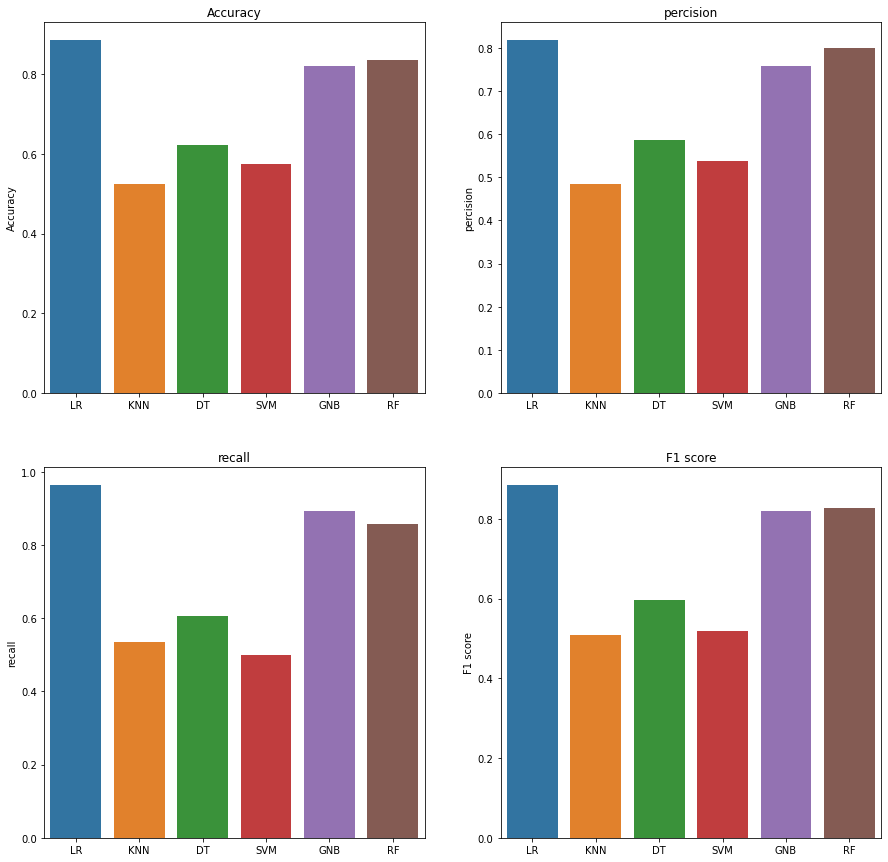

In [79]:

comparison = pd.DataFrame({
    "LR":{'Accuracy':log_accuracy, 'percision':logistic_percision,'recall':logistic_recall,'F1 score':logistic_f1},
    "KNN":{'Accuracy':knn_accuracy,'percision':knn_percision,'recall':knn_recall,'F1 score':knn_f1},
    "DT":{'Accuracy':tree_accuracy,'percision':tree_percision,'recall':tree_recall,'F1 score':tree_f1},
    "SVM":{'Accuracy':svm_accuracy,'percision':svm_percision,'recall':svm_recall,'F1 score':svm_f1},
    "GNB":{'Accuracy':clf_accuracy,'percision':clf_percision,'recall':clf_recall,'F1 score':clf_f1},
    "RF":{'Accuracy':rfc_accuracy,'percision':rfc_percision,'recall':rfc_recall,'F1 score':rfc_f1}
}).T
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','percision','recall','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()

In [80]:
comparison = pd.DataFrame({
    "LR":{'Accuracy':log_accuracy, 'percision':logistic_percision,'recall':logistic_recall,'F1 score':logistic_f1},
    "KNN":{'Accuracy':knn_accuracy,'percision':knn_percision,'recall':knn_recall,'F1 score':knn_f1},
    "DT":{'Accuracy':tree_accuracy,'percision':tree_percision,'recall':tree_recall,'F1 score':tree_f1},
    "SVM":{'Accuracy':svm_accuracy,'percision':svm_percision,'recall':svm_recall,'F1 score':svm_f1},
    "GNB":{'Accuracy':clf_accuracy,'percision':clf_percision,'recall':clf_recall,'F1 score':clf_f1},
    "RF":{'Accuracy':rfc_accuracy,'percision':rfc_percision,'recall':rfc_recall,'F1 score':rfc_f1}
})
comparison.head()

,LR,KNN,DT,SVM,GNB,RF
Accuracy,0.885246,0.524590,0.622951,0.573770,0.819672,0.836066
percision,0.818182,0.483871,0.586207,0.538462,0.757576,0.800000
recall,0.964286,0.535714,0.607143,0.500000,0.892857,0.857143
F1 score,0.885246,0.508475,0.596491,0.518519,0.819672,0.827586


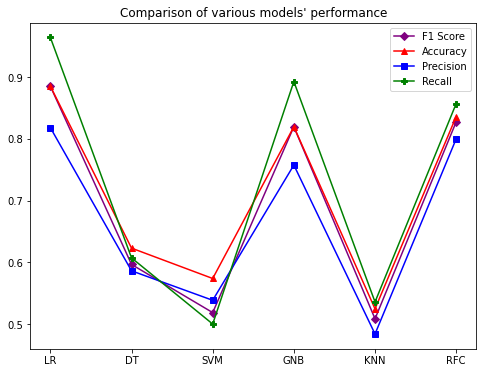

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.barh(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[logistic_f1,tree_f1,svm_f1,clf_f1,knn_f1,rfc_f1],color=['red','green','purple','orange','Blue'])
plt.plot(['LR','DT','SVM','GNB','KNN','RFC'],[logistic_f1,tree_f1,svm_f1,clf_f1,knn_f1,rfc_f1],color='purple',marker='D')
plt.plot(['LR','DT','SVM','GNB','KNN','RFC'],[log_accuracy,tree_accuracy,svm_accuracy,clf_accuracy,knn_accuracy,rfc_accuracy],color='red',marker='^')
plt.plot(['LR','DT','SVM','GNB','KNN','RFC'],[logistic_percision,tree_percision,svm_percision,clf_percision,knn_percision,rfc_percision],color='blue',marker='s')
plt.plot(['LR','DT','SVM','GNB','KNN','RFC'],[logistic_recall,tree_recall,svm_recall,clf_recall,knn_recall,rfc_recall],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))

plt.title('Comparison of various models\' performance')

plt.show(fig)